# Applied Statistics Assessment

This notebook contains solutions to the assessment set in the module Applied Statistics (Winter 25/26) at ATU.

In [1]:
# Import required libraries.
import numpy as np                  # https://numpy.org
import matplotlib.pyplot as plt     # https://matplotlib.org
#plt.style.use('ggplot')
from scipy import stats             # https://docs.scipy.org
import math
import itertools
import random

## Problem 1: Extending the Lady Tasting Tea

Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using `numpy` by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

[Lady Tasting tea experiment - Numberphile](https://www.youtube.com/watch?v=8ERFV7rV0vg)

[Lady Tasting tea experiment - Rob Sinn](https://www.youtube.com/watch?v=kR1qeXDwCSc) 

[Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) came up with the [null hypothesisis?](https://www.geeksforgeeks.org/maths/null-hypothesis/) 

Statistical analysis of A/B tests.

We can shuffle using numpy `shuffle` function ([see official documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.shuffle.html)).

[Generator shuffle](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle)

p-value described [here](https://www.geeksforgeeks.org/machine-learning/p-value/)

`In general, a small p-value indicates that the observed data is unlikely to have occurred by random chance alone, which leads to the rejection of the null hypothesis.`

In [2]:
# Define the number of cups
num_cups = 12

# Define the number of cups with milk first
num_cups_milk_first = 4

# Define the number of cups with tea first
num_cups_tea_first = 8

We can make an array of numbers representing the 12 cups of tea.

In [3]:
cups = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

https://lisds.github.io/textbook/wild-pandas/fishers_tea.html

We will select 4 cups from the 12.

If there are 12 cups of tea, how many different ways are there of selecting 4 cups from them? "binomial coefficient? use `math.comb()`

https://www.geeksforgeeks.org/maths/n-choose-k-formula/

`Combination is described as the process of choosing one, two, or a few elements from a given sequence, independent of the order in which they appear.`

So Order doesnt matter.

But you can't pick the same cup more than once in this experiment.


So if we have 1 2 3 4 5 6 7 8 9 10 11 12 

and pick four for example like this 2 5 7 8, its the same as 5 7 2 8 as order doesn't matter

but if we select one, then there is 11 other cups to choose from then, not 12 anymore.

$ C(n, k) = \frac{n!}{k!(n-k)!} $
 
- n! is the factorial of n.
- k! is the factorial of k.


Putting that into Python code:

In [4]:
# Pick some example values
n = 12  # Total number of elements, here it is the total cups of tea
k = 4   # Number of elements to choose, here it is the 'milk-first' choices

# Calculate the number of ways of selecting k objects from n without replacement and without order
result = math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

# Display result
result

495

We can use the [`math`](https://docs.python.org/3/library/math.html) library, specifically the [`comb`](https://docs.python.org/3/library/math.html#math.comb) function to do this for us.

In [5]:
# Calculate combinations using math.comb
result = math.comb(n, k)

# Print result
print(f"The number of ways to choose {k} elements from {n} is: {result}")

The number of ways to choose 4 elements from 12 is: 495


[`Itertools`](https://docs.python.org/3/library/itertools.html) has a function called [`combinations`](https://docs.python.org/3/library/itertools.html#itertools.combinations). It uses `math.comb()` under the hood.

- https://www.geeksforgeeks.org/python/python-itertools-combinations-function/

`itertools.combinations(iterable, r)`

`Return r length subsequences of elements from the input iterable.`

In [6]:
# Simple example of 3 elements, return all possible unordered pairs of elements
example = list(itertools.combinations("123", 2))

print(example)

[('1', '2'), ('1', '3'), ('2', '3')]


Now to use 12 cups, where we select 4

The `cups` list is the iterable, `num_cups_milk_first` is the number of subsequences to be selected from the iterable.

In [7]:
# Determine the different ways of selecting milk-first cups out of the total number of cups of tea
combinations = list(itertools.combinations(cups, num_cups_milk_first)) # 'cups' is the list of cup labels

# Print to console
#combinations

Those are all unique combinations (without thinking about the order of them), there is no repetition. There is 2,3,4,5 - you wont see 2,4,3,5. There are 495 rows as calculated by the formula in `results` above.

In [8]:
# Count the number of combinations
count = len(combinations)

# Print the count
print(f'Total number of combinations: {count}')

Total number of combinations: 495


Now the experiment bit. Shuffle the 12 cups, select 4 at random. We can use the [`random`](https://docs.python.org/3/library/random.html) module. It's a pseudo-random number generator.

Use a set instead of a list. Why? Set is unordered, lists are ordered.

- https://www.geeksforgeeks.org/python/sets-vs-lists-python/

In [9]:
# Select 4 at random, convert to a set in-line
milk_first = set(random.sample(cups, num_cups_milk_first))

# Display the set
milk_first

{2, 7, 8, 12}

It looks like it sorts them automatically in numerical order. We are using numbers as labels, the cups are not in any particular order.

So if we get {1, 6, 7, 11} it has zero overlap with {2, 5, 8, 10}. It has 100% overlap with {1, 6, 7, 11}.

Chances of selecting 4 correct cups from the 495 unique combinations?

In [10]:
probability = 1/495

probability

0.00202020202020202

### Simulate randomly selecting 4 cups as the 'milk-first' cups

In [11]:
# Say 1, 4, 5, 8 are the "correct" cups
correct_cups = {1,4,5,8}

# Define the number of simulations
num_trials = 10000

# Create an array to hold success counts for the simulation
success_count = 0

# Run the simulation
for i in range(num_trials):
    # Shuffle the cups randomly
    np.random.shuffle(cups)
    
    # Select the cups as milk-first
    selected_cups = random.sample(cups, k)
    
    # Check if the selected cups match the correct cups
    if set(selected_cups) == set(correct_cups):
        success_count += 1

# Calculate the probability
probability = success_count / num_trials

# Print results
print(f"Simulated Probability of correctly identifying all {k} cups by chance: {probability:.4f}")

Simulated Probability of correctly identifying all 4 cups by chance: 0.0019


Compared to original experiment, there is way less chance to randomly select the correct 4 cups, as there are way more combinations (495 vs original 70). 

interpreting p-value:

- https://en.fernandafperes.com.br/blog/phd-tastes-tea/

In [12]:
p_original = (1/70) * 100
print(f"Original: {p_original:.3f}%")

p_extended = (1/495) * 100
print(f"Extended: {p_extended:.3f}%")

Original: 1.429%
Extended: 0.202%


So maybe tighten the p-threshold because of the low probability of selecting 4 correct cups out of 495 combinations.

## Problem 2: Normal Distribution

Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.

How to generate random numbers following a Normal Distribution using the `numpy.random.normal()` method:

- https://www.geeksforgeeks.org/numpy/normal-distribution-in-numpy/

Offical `nupmy` documentation found [here](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)

In [13]:
# Generate samples from the standard normal distribution
samples = np.random.normal(loc=0.0, scale=1.0, size=None)

# Display
samples

-0.08709555331081315

From the docs:

```
loc: Mean (“centre”) of the distribution.

scale: Standard deviation (spread or “width”) of the distribution. Must be non-negative.

size: Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars. Otherwise, np.broadcast(loc, scale).size samples are drawn.
```

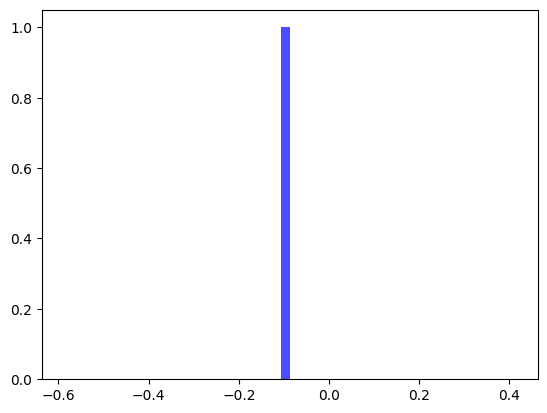

In [14]:
# Plot the distribution .
plt.hist(samples, bins=50, color='blue', alpha=0.7)

# Display the plot.
plt.show()

One sample was generated because supplied the size (shape) as None. We can give it a number of samples to generate.

In [15]:
# Define number of samples to generate
n_samples = 100000

# Generate samples from the standard normal distribution
samples = np.random.normal(loc=0.0, scale=1.0, size=(n_samples))

# Display the samples (truncated)
samples

array([-1.28397643, -1.91692907, -0.87416988, ...,  0.19534844,
        1.76859054, -0.6630563 ])

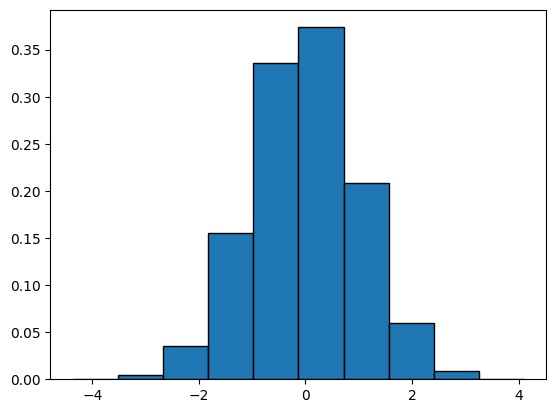

In [16]:
# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot histogram.
ax.hist(samples, edgecolor='black', density=True) #, bins=np.linspace(-4, 4, 31))

# Decorate the plot.
ax.set_title('', fontsize=16, fontweight='bold')
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=14)

# Display the plot.
plt.show()

Now use a two-dimensional array, 100,000 x 10 .

We will get 100,000 rows and 10 columns of samples.

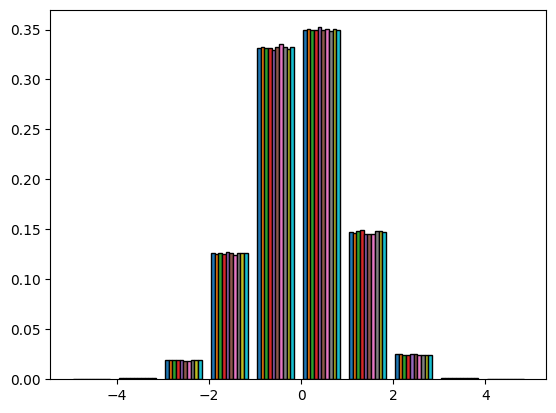

In [17]:
# Define number of samples to generate, and 
n_samples = 100000
sample_size = 10

# Generate samples from the standard normal distribution
samples = np.random.normal(loc=0.0, scale=1.0, size=(n_samples, sample_size))

# Create a figure and axis for the plot.
fig, ax = plt.subplots()

# Plot the histogram.
ax.hist(samples, edgecolor='black', density=True)

# Decorate the plot.
ax.set_title('', fontsize=16, fontweight='bold')
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=14)

# Display the plot.
plt.show()

From the `numpy` docs, using delta degrees of freedomn (ddof).

We can calculate `population standard deviation` using `ddof=0`.

Likewise, we can calculate the `sample standard deviation` by setting `ddof=1`.

- https://numpy.org/doc/stable/reference/generated/numpy.std.html

- https://mathmonks.com/standard-deviation/population-and-sample-standard-deviation

`The population standard deviation represents the entire population of an area under consideration, such as a national census or during a financial report. Thus, it includes all individuals in a population.`

`The sample standard deviation estimates the standard deviation of a dataset, which is a subset of the population.`

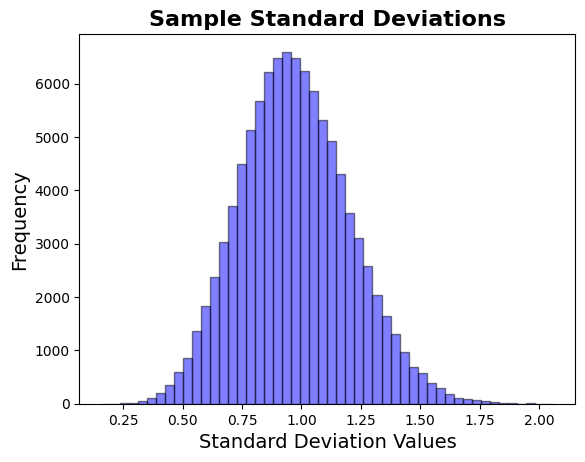

In [18]:
# Calculate sample standard deviations (ddof=1)
sample_sd = np.std(samples, axis=1, ddof=1)

# Create a figure and axis for the plot.
fig, ax = plt.subplots()

# Plot histogram
ax.hist(sample_sd, bins=50, alpha=0.5, label='Sample SD (ddof=1)', color='blue', edgecolor='black')

# Decorate the plot.
ax.set_title('Sample Standard Deviations', fontsize=16, fontweight='bold')
ax.set_xlabel('Standard Deviation Values', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Display the plot.
plt.show()

Now do populatiin standard deviation

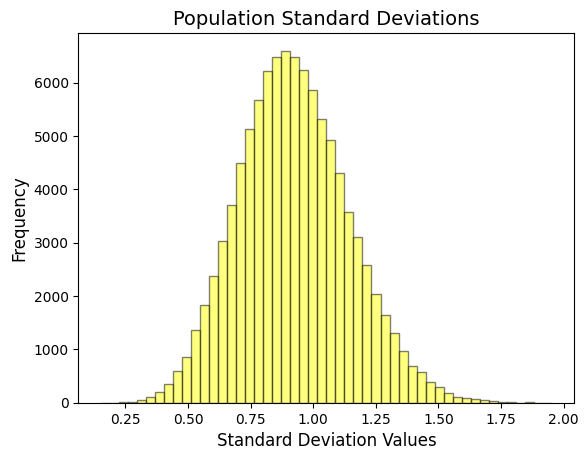

In [19]:
# Calculate population standard deviations (ddof=0)
population_sd = np.std(samples, axis=1, ddof=0)

# Create a figure and axis for the plot.
fig, ax = plt.subplots()

# Plot histogram
ax.hist(population_sd, bins=50, alpha=0.5, label='Population SD (ddof=0)', color='yellow', edgecolor='black')

# Decorate the plot.
ax.set_title('Population Standard Deviations', fontsize=14)
ax.set_xlabel('Standard Deviation Values', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# Display the plot.
plt.show()

Put both on same plot

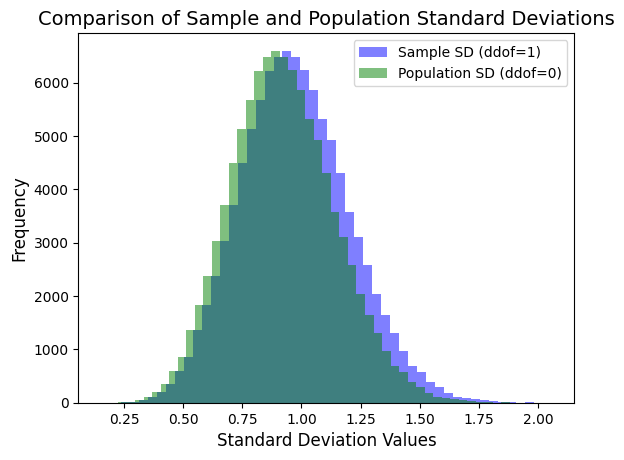

In [20]:
# Create a figure and axis for the plot.
fig, ax = plt.subplots()

# Plot the histograms.
ax.hist(sample_sd, bins=50, alpha=0.5, label='Sample SD (ddof=1)', color='blue')
ax.hist(population_sd, bins=50, alpha=0.5, label='Population SD (ddof=0)', color='green')

# Add titles and labels.
ax.set_title('Comparison of Sample and Population Standard Deviations', fontsize=14)
ax.set_xlabel('Standard Deviation Values', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# Add a legend.
ax.legend()

# Display the plot.
plt.show()

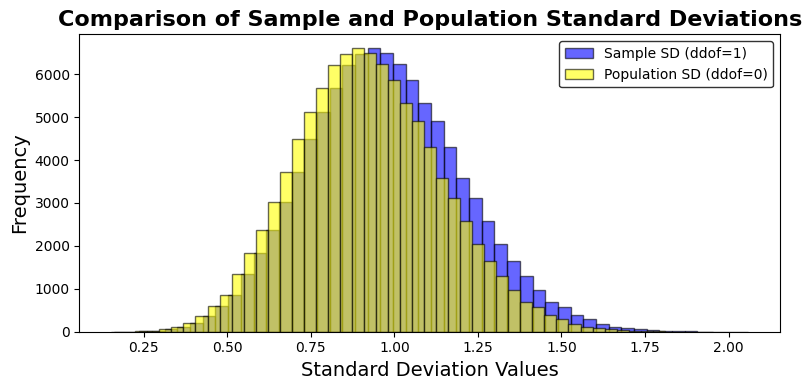

In [21]:
# Create a figure and axis for the plot.
fig, ax = plt.subplots(figsize=(8, 4))

# Plot histograms for sample and population standard deviations.
ax.hist(sample_sd, bins=50, alpha=0.6, label='Sample SD (ddof=1)', color='blue', edgecolor='black')
ax.hist(population_sd, bins=50, alpha=0.6, label='Population SD (ddof=0)', color='yellow', edgecolor='black')

# Add titles and labels.
ax.set_title('Comparison of Sample and Population Standard Deviations', fontsize=16, fontweight='bold')
ax.set_xlabel('Standard Deviation Values', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Add a legend with a transparent background.
ax.legend(frameon=True, facecolor='white', edgecolor='black')

# Display the plot.
plt.tight_layout()

## Problem 3: t-Tests

A type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference `d = 0, 0.1, 0.2, … , 1.0`, repeat the following simulation 1,000 times:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean `d` and standard deviation 1.
2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
Record the proportion of times the null hypothesis is not rejected.
3. Plot this proportion against `d`, and explain how the type II error rate changes as the difference in means increases.

In [22]:
# generate values using numpy from 0 to 1.0 with an incrememt of 1.0.
mean_differences = np.arange(0, 1.0, 0.1)

# define number of simulations.
n_simulations = 1000

In [23]:
# try with one value first
d = 0.5

Now to draw two samples of size 100

In [24]:
# Number of samples
n_samples = 100

# standard normal dist
sample_1 = np.random.normal(loc=0, scale=1, size=n_samples)

# normal distribution (loc is the mean of the normal distribution remember)
sample_2 = np.random.normal(loc=d, scale=1, size=n_samples) 

Do some plotting:

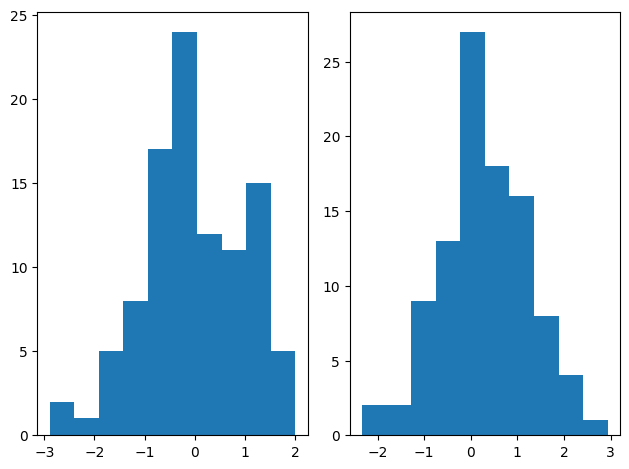

In [25]:
# Plot histograms
plt.subplot(1, 2, 1)
plt.hist(sample_1)

plt.subplot(1, 2, 2)
plt.hist(sample_2)

# Display the plot.
plt.tight_layout()

The `scipy.stats.ttest_ind` function can be used to conduct an independent samples t-test, returning the t-statistic and p-value.

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

`
This is a test for the null hypothesis that 2 independent samples have identical average (expected) values.
`

Can be used to check if for example two groups of data are statistically different from each other eg deos one  machine learning algorithm perform better than another

- https://pythonguides.com/python-scipy-ttest_ind/

It can help identify is something is statistically relevent or if it is something that happened by chance.

In [26]:
# Run t-test
t_statistic, p_value = stats.ttest_ind(sample_1, sample_2)

print(t_statistic, p_value)

-2.2818882714170607 0.02355926628886967


Now do for all in d list

In [27]:
for d in mean_differences:
    # standard normal dist
    sample_1 = np.random.normal(loc=0, scale=1, size=n_samples)

    # normal distribution (loc is the mean of the normal distribution remember)
    sample_2 = np.random.normal(loc=d, scale=1, size=n_samples) 

    # do the test
    t_statistic, p_value = stats.ttest_ind(sample_1, sample_2)

## Problem 4: ANOVA
Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

1. Perform a one-way ANOVA to test whether all three means are equal.
2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
3. Compare the conclusions.

Write a short note on why ANOVA is preferred over running several t-tests.

***

END